batch[0].shape = torch.Size([32, 128, 128, 3])
batch[1].shape = torch.Size([32, 128, 128, 1])
batch[2].shape = torch.Size([32, 4, 4])
transform = 
[[  -0.      0.03    0.34  -21.47]
 [   0.05    0.33   -0.03  -41.51]
 [  -0.33    0.05   -0.01 -178.47]
 [   0.      0.      0.      1.  ]]


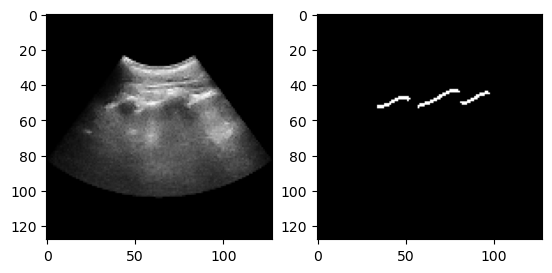

In [3]:
data_folder = "g:/SpineUs/Data/TrainingDataPrep"

from torch.utils.data import DataLoader
from torchvision import transforms
from UltrasoundDataset import UltrasoundDataset
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = UltrasoundDataset(data_folder)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get the first batch
batch = next(iter(dataloader))

print(f"batch[0].shape = {batch[0].shape}")
print(f"batch[1].shape = {batch[1].shape}")
print(f"batch[2].shape = {batch[2].shape}")

# Get the first image, segmentation, and transform
image = batch[0][0, :, :, 0]
segmentation = batch[1][0]
transform = batch[2][0]

# Print trasnform array values with a precision of 2
np.set_printoptions(precision=2, suppress=True)
print(f"transform = \n{transform.numpy()}")

# Plot the image, segmentation, and transform
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(segmentation, cmap="gray")
plt.show()


In [4]:
# Iterate through the dataset by batches and time how long it takes.

batch_size = 32

import time
start_time = time.time()
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)  # If shuffle=True, the time to iterate through the dataset will be longer
batch_counter = 0
for batch in dataloader:
    batch_counter += 1
end_time = time.time()

print(f"Number of images in dataset: {len(dataset)}")
print(f"Batch size: {batch_size}")
print(f"Number of batches: {batch_counter}")
print(f"Time to iterate through the dataset: {end_time - start_time:.2f} seconds")

Number of images in dataset: 845
Batch size: 32
Number of batches: 27
Time to iterate through the dataset: 0.06 seconds


In [14]:
# Try a resize transfrom on the image

import torch

resize_transform = transforms.Resize((64, 64))
images = batch[0]

print(images.shape)

resized = resize_transform(np.transpose(images, (0,3,1,2))).permute(0,2,3,1)
print(resized.shape)
print(type(resized))

torch.Size([13, 128, 128, 3])
torch.Size([13, 64, 64, 3])
<class 'torch.Tensor'>
